# Farm Plots EDA

## Setup

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [2]:
pd.set_option('display.max_columns', 500)

## Load and explore data

In [3]:
farm_plots = gpd.read_file('../data/farm_plots/Silowana_Conservation_Agricultu.shp')

In [4]:
farm_plots.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
farm_plots.shape

(2300, 46)

In [6]:
farm_plots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID_1  689 non-null    object  
 1   globalid    689 non-null    object  
 2   Date        689 non-null    object  
 3   Farmers_na  1989 non-null   object  
 4   Village_na  2200 non-null   object  
 5   Community_  1679 non-null   object  
 6   Gender_typ  649 non-null    object  
 7   Head_of_ho  652 non-null    object  
 8   Profits_fr  618 non-null    object  
 9   Non_Agricu  485 non-null    object  
 10  Profits_No  544 non-null    object  
 11  Fellumbus   651 non-null    object  
 12  Fellumbus_  204 non-null    object  
 13  Fellumbus1  689 non-null    object  
 14  Post_Harve  633 non-null    object  
 15  Post_Har_1  689 non-null    object  
 16  Post_Har_2  267 non-null    object  
 17  Coorparati  195 non-null    object  
 18  Training    642 non-null    object  
 19

In [7]:
farm_plots.head()

,OBJECTID_1,globalid,Date,Farmers_na,Village_na,Community_,Gender_typ,Head_of_ho,Profits_fr,Non_Agricu,Profits_No,Fellumbus,Fellumbus_,Fellumbus1,Post_Harve,Post_Har_1,Post_Har_2,Coorparati,Training,Type_of_Tr,Number_of_,Training_o,HWC,HWC_loss,Loss_Harve,Loss_Units,Species,Data_colle,CreationDa,EditDate,ObjectID_2,GlobalID_1,Crop_Type,Size_of_fi,Method,Conservati,Total_Harv,Units,Intial_inv,ParentGlob,Creation_1,EditDate_1,x,y,Year,geometry
0,1,dcfcd664-11c2-4605-9b27-890c9e410c99,10/18/20,Nasilele Muluzi,Kanjimwelo,Sesheke West,male,yes,below 1000,None,below 1000,yes,below 500,100,no,0,None,None,no,None,0,None,no,None,0,None,None,Rabecca Simushi,10/18/20,10/18/20,1,d3a8ce23-1b38-47bb-bda5-4a3820c8b605,Maize,1 la,Traditional Agriculture,None,0,None,below 1000,dcfcd664-11c2-4605-9b27-890c9e410c99,10/18/20,10/18/20,23.874530,-16.923060,2019,POINT (2657700.523 -1911870.608)
1,2,075b326d-fa10-4c8a-9970-0e3ae78a7e9c,10/18/20,Nanunyi Nanunyi,Kanjimwelo,Sesheke West,male,yes,below 1000,Livestock,below 1000,yes,below 500,9,no,0,None,None,yes,Conservation Agriculture,1,None,no,None,0,None,None,Rabec ca Simushi,10/18/20,10/18/20,2,3ee14237-0faf-444e-a83d-1e7bf42e4835,Maize,2 la,Traditional Agriculture,None,0,None,below 1000,075b326d-fa10-4c8a-9970-0e3ae78a7e9c,10/18/20,10/18/20,23.874530,-16.923060,2019,POINT (2657700.523 -1911870.608)
2,3,e5e254ad-8edf-453f-accd-c281967117d4,10/18/20,Libulelo Lumano,Kanjimwelo,Sesheke West,female,yes,below 1000,None,below 1000,yes,below 500,0,no,0,None,None,no,None,0,None,no,None,0,None,None,Rabecca Simushi,10/18/20,10/18/20,3,7133bc39-8c4a-47f7-9634-5f7728e44f3d,Maize,2-4 la,Traditional Agriculture,None,0,None,None,e5e254ad-8edf-453f-accd-c281967117d4,10/18/20,10/18/20,23.874790,-16.925308,2019,POINT (2657729.466 -1912132.221)
3,4,e5c9ba5e-db53-4dfe-abc3-f5402d6a8b42,10/18/20,Manga Mwiya,Kanjimwelo,Sesheke West,female,yes,below 1000,None,None,yes,below 500,5,no,0,None,None,no,None,0,None,no,None,0,None,None,Rabecca simushi,10/18/20,10/18/20,4,9a068b92-4d02-44fc-9bbd-100794252f47,Maize,2 la,Traditional Agriculture,None,0,None,None,e5c9ba5e-db53-4dfe-abc3-f5402d6a8b42,10/18/20,10/18/20,23.874348,-16.925517,2019,POINT (2657680.299 -1912156.463)
4,5,0a514e59-2127-47cd-94c0-679457f90ef8,10/18/20,Lishomwa musiwa,Kanjimwelo,Sesheke West,female,yes,below 1000,None,below 1000,yes,below 500,12,no,0,None,None,no,None,0,None,no,None,0,None,None,Rabecca simishi,10/18/20,10/18/20,5,4627fcc9-8e3a-48a4-9d17-f3dfc5b7d89d,Maize,4-or more la,Traditional Agriculture,None,0,tins,below 1000,0a514e59-2127-47cd-94c0-679457f90ef8,10/18/20,10/18/20,23.874083,-16.924840,2019,POINT (2657650.800 -1912077.726)


<AxesSubplot:>

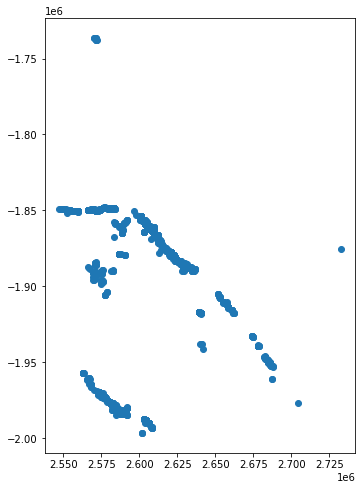

In [8]:
farm_plots.plot(figsize=(12,8))

## Explore features

In [9]:
def plot_frequencies(df, feature):
    df[feature].fillna('unknown').value_counts().plot.bar(title='Feature: {}'.format(feature))
    plt.ylabel('Number of observations')

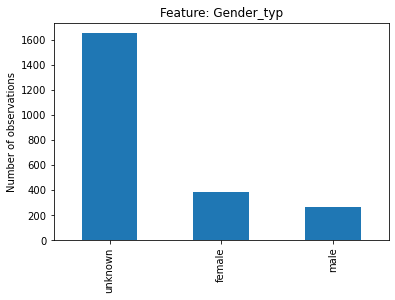

In [10]:
plot_frequencies(farm_plots, 'Gender_typ')

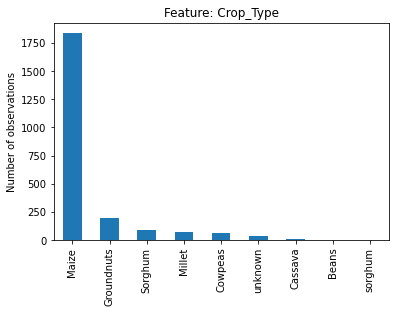

In [11]:
plot_frequencies(farm_plots, 'Crop_Type')

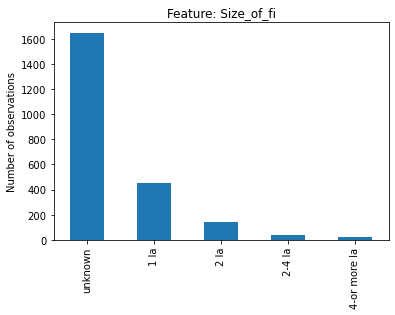

In [12]:
plot_frequencies(farm_plots, 'Size_of_fi')

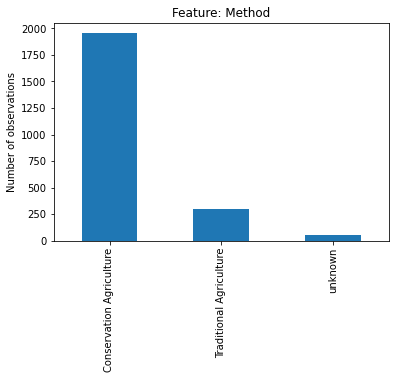

In [13]:
plot_frequencies(farm_plots, 'Method')

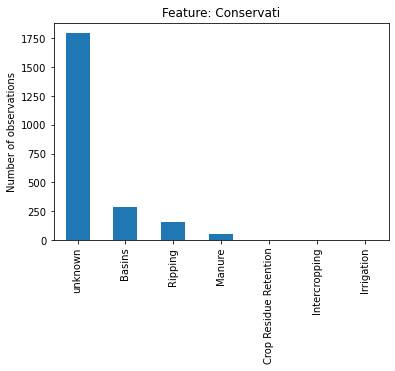

In [14]:
plot_frequencies(farm_plots, 'Conservati')

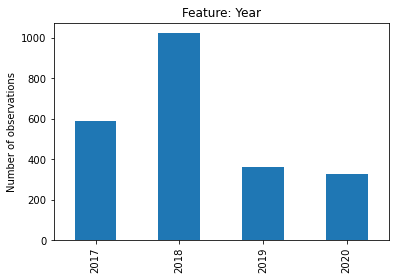

In [15]:
farm_plots['Year'].fillna('unknown').value_counts().sort_index().plot.bar(title='Feature: {}'.format('Year'))
plt.ylabel('Number of observations')
plt.show()

### Explore dates

In [16]:
farm_plots['Date'].fillna('unknown').value_counts().head()

unknown     1611
11/30/20      51
12/1/201      42
10/12/20      34
11/23/20      33
Name: Date, dtype: int64

In [17]:
farm_plots['CreationDa'].fillna('unknown').value_counts().head()

unknown     1611
1/7/2020     278
11/29/20     160
12/18/20     101
11/25/20      59
Name: CreationDa, dtype: int64

In [18]:
farm_plots['EditDate'].fillna('unknown').value_counts().head()

unknown     1611
1/7/2020     278
11/29/20     160
12/18/20     101
11/25/20      59
Name: EditDate, dtype: int64

In [19]:
farm_plots['Creation_1'].fillna('unknown').value_counts().head()

unknown     1611
1/7/2020     278
11/29/20     160
12/18/20     101
11/25/20      59
Name: Creation_1, dtype: int64

In [20]:
farm_plots['EditDate_1'].fillna('unknown').value_counts().head()

unknown     1611
1/7/2020     278
11/29/20     160
12/18/20     101
11/25/20      59
Name: EditDate_1, dtype: int64

**It seems as if the only reliable date information is contained in the column 'Year' since all other columns that are supposed to contain dates seem to contain no or not complete date information.**

## Map farm plots

In [21]:
farm_plots_2017 = farm_plots[farm_plots['Year'] == 2017].reset_index(drop=True)
farm_plots_2018 = farm_plots[farm_plots['Year'] == 2018].reset_index(drop=True)
farm_plots_2019 = farm_plots[farm_plots['Year'] == 2019].reset_index(drop=True)
farm_plots_2020 = farm_plots[farm_plots['Year'] == 2020].reset_index(drop=True)

In [22]:
locations_2017 = farm_plots_2017[['y', 'x']]
locations_list_2017 = locations_2017.values.tolist()

locations_2018 = farm_plots_2018[['y', 'x']]
locations_list_2018 = locations_2018.values.tolist()

locations_2019 = farm_plots_2019[['y', 'x']]
locations_list_2019 = locations_2019.values.tolist()

locations_2020 = farm_plots_2020[['y', 'x']]
locations_list_2020 = locations_2020.values.tolist()

In [23]:
%%time

map = folium.Map(location=[-16.5, 23.4], zoom_start=8)

title = 'Farm Plot Locations in the Kavango Zambezi Conservation Area'

title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             <p align="center"> <font color="green">Green=</font>2017; <font color="red">Red=</font>2018; <font color="blue">Blue=</font>2019; <font color="orange">Orange=</font>2020 </p>
             '''.format(title)

map.get_root().html.add_child(folium.Element(title_html))

for point in range(0, len(locations_list_2017)):
    folium.Circle(locations_list_2017[point], color='green', radius=5, label='test').add_to(map)

for point in range(0, len(locations_list_2018)):
    folium.Circle(locations_list_2018[point], color='red', radius=5).add_to(map)

for point in range(0, len(locations_list_2019)):
    folium.Circle(locations_list_2019[point], color='blue', radius=5).add_to(map)

for point in range(0, len(locations_list_2020)):
    folium.Circle(locations_list_2020[point], color='orange', radius=5).add_to(map)

map

CPU times: user 90.7 ms, sys: 3.59 ms, total: 94.3 ms
Wall time: 102 ms


In [24]:
map.save('farm_plots_locations_by_year.html')